In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.special import jv

In [2]:
FH = []
FE = []
DS = []
steps = []
lambda_ = 0.027 #Довжина хвилі [см]
D = 0.6 #Діаметр дзеркала [м]
focus = 0.25 #Фокусна відстань [м]

k= 2 * np.pi / lambda_ #Хвильове число
R0 = 0.3 #Радіус дзеркала
p = 0.5 #Подвоєний фокус відстані 

In [9]:
# Кутовий простір
theta = np.linspace(-np.pi/2, np.pi/2, 100000)

v = 3.5 * R0/p
u = k * R0 * np.sin(theta)


FH = np.cos(theta/2)**2 * (0.74 * (v * jv(1, v) * jv(0, u) - u * jv(1, u) * jv(0, v)) / (v**2 - u**2) + 0.26 * jv(1,u)/u - 0.25 * (u * jv(1,u)*jv(2, 1.5*v) - 1.5*v*jv(1, 1.5*v) * jv(2,u))/((1.5*v)**2 - u**2)) * 1/(0.74 * jv(1,v)/v + 0.13)
for i in range(1, len(FH) - 1):
    if 0.707 < FH[i] < 0.708 and math.degrees(theta[i]) > 0:
        SGP = math.degrees(theta[i]) * 2
        y = FH[i]
        break
if SGP is not None:
    print(f"Ширина головної пелюстки (ШГП) = {round(SGP, 2)}\u00b0")
else:
    print(f"Ширина головної пелюстки (ШГП) не знайдена.")    
FE = np.cos(theta/2)**2 * (0.74 * (v * jv(1, v) * jv(0, u) - u * jv(1, u) * jv(0, v)) / (v**2 - u**2) + 0.26 * jv(1,u)/u + 0.25 * (u * jv(1,u)*jv(2, 1.5*v) - 1.5*v*jv(1, 1.5*v) * jv(2,u))/((1.5*v)**2 - u**2)) * 1/(0.74 * jv(1,v)/v + 0.13)

Ширина головної пелюстки (ШГП) = 1.64°


In [10]:
# Знаходження максимумів та мінімумів
# Знаходження максимумів та мінімумів для FH
FH_max = []
FH_min = []
for i in range(1, len(FH) - 1):
    if FH[i] > FH[i - 1] and FH[i] > FH[i + 1]:
        FH_max.append(i)
    elif abs(FH[i]) < abs(FH[i - 1]) and abs(FH[i]) < abs(FH[i + 1]):
        FH_min.append(i)

# Знаходження максимумів та мінімумів для FE
FE_max = []
FE_min = []
for i in range(1, len(FE) - 1):
    if FE[i] > FE[i - 1] and FE[i] > FE[i + 1]:
        FE_max.append(i)
    elif abs(FE[i]) < abs(FE[i - 1]) and abs(FE[i]) < abs(FE[i + 1]):
        FE_min.append(i)
        
# Конвертація theta в градуси для графіка
theta_deg = np.degrees(theta)

Табл. 1 - Значення мінімальних кутів для FH
------------------------------
| № |  θ  |FH(θ)|
| 1 |1.98| 0.00|
| 2 |3.52| 0.00|
| 3 |5.06| 0.00|
| 4 |6.61| 0.00|
| 5 |8.17| 0.00|
| 6 |9.73| 0.00|
| 7 |11.30| 0.00|
| 8 |12.88| 0.00|
| 9 |14.47| 0.00|
| 10 |16.08| 0.00|
| 11 |17.69| 0.00|
| 12 |19.32| 0.00|
| 13 |20.97| 0.00|
| 14 |22.64| 0.00|
| 15 |24.32| 0.00|
| 16 |26.03| 0.00|
| 17 |27.76| 0.00|
| 18 |29.53| 0.00|
| 19 |31.32| 0.00|
| 20 |33.15| 0.00|
| 21 |35.02| 0.00|
| 22 |36.93| 0.00|
| 23 |38.89| 0.00|
| 24 |40.91| 0.00|
| 25 |42.99| 0.00|
| 26 |45.14| 0.00|
| 27 |47.38| 0.00|
| 28 |49.71| 0.00|
| 29 |52.17| 0.00|
| 30 |54.77| 0.00|
| 31 |57.54| 0.00|
| 32 |60.55| 0.00|
| 33 |63.87| 0.00|
| 34 |67.64| 0.00|
| 35 |72.14| 0.00|
| 36 |78.18| 0.00|
------------------------------
Табл. 2 - Значення мінімальних кутів для FE
------------------------------
| № |  θ  |FE(θ)|
| 1 |2.29| 0.00|
| 2 |3.69| 0.00|
| 3 |5.18| 0.00|
| 4 |6.70| 0.00|
| 5 |8.24| 0.00|
| 6 |9.79| 0.00|
| 7 |11.35| 

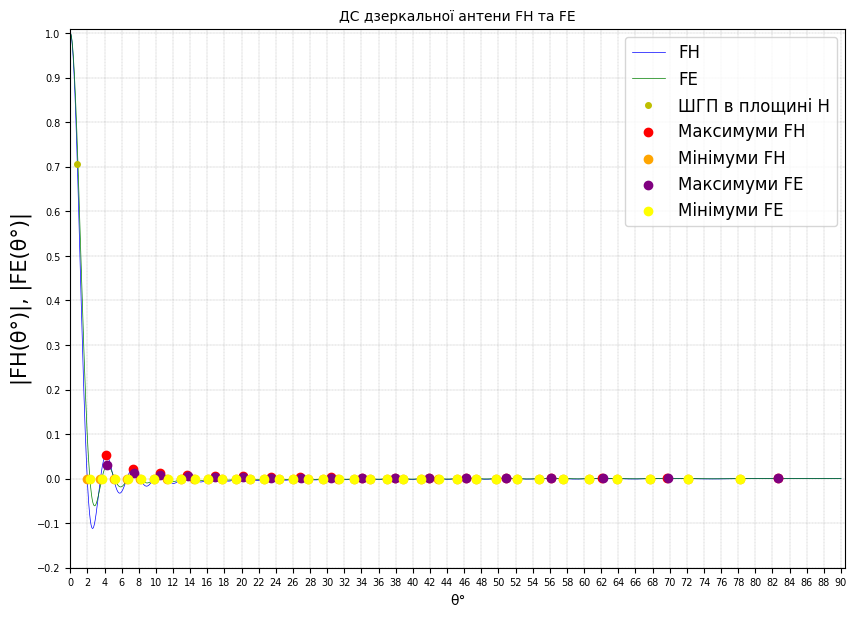

In [11]:
# Побудова графіка
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(theta_deg, FH, label='FH', color='blue', linewidth=0.5)
ax.plot(theta_deg, FE, label='FE', color='green', linewidth=0.5)

ax.plot(SGP / 2, y, 'oy', markersize=4, label="ШГП в площині H")

# Позначення максимумів та мінімумів на графіку
ax.scatter(theta_deg[FH_max], FH[FH_max], color='red', label='Максимуми FH', zorder=5)
ax.scatter(theta_deg[FH_min], FH[FH_min], color='orange', label='Мінімуми FH', zorder=5)
ax.scatter(theta_deg[FE_max], FE[FE_max], color='purple', label='Максимуми FE', zorder=5)
ax.scatter(theta_deg[FE_min], FE[FE_min], color='yellow', label='Мінімуми FE', zorder=5)

print("Табл. 1 - Значення мінімальних кутів для FH")
print("------------------------------")
print("| № |  θ  |FH(θ)|")
m = 1
for i in FH_min:
    if theta_deg[i] > 0:
        print(f"| {m} |{theta_deg[i]:.2f}| {abs(FH[i]):.2f}|")
        m += 1
print("------------------------------")

print("Табл. 2 - Значення мінімальних кутів для FE")
print("------------------------------")
print("| № |  θ  |FE(θ)|")
m = 1
for i in FE_min:
    if theta_deg[i] > 0:
        print(f"| {m} |{theta_deg[i]:.2f}| {abs(FE[i]):.2f}|")
        m += 1
print("------------------------------")

print("Табл. 3 - Значення максимальних кутів для FH")
print("------------------------------")
print("| № |  θ  |FH(θ)|")
m = 1
for i in FH_max:
    if theta_deg[i] > 0:
        print(f"| {m} |{theta_deg[i]:.2f}| {abs(FH[i]):.2f}|")
        m += 1
print("------------------------------")

print("Табл. 4 - Значення максимальних кутів для FE")
print("------------------------------")
print("| № |  θ  |FE(θ)|")
m = 1
for i in FE_max:
    if theta_deg[i] > 0:
        print(f"| {m} |{theta_deg[i]:.2f}| {abs(FE[i]):.2f}|")
        m += 1
print("------------------------------")

ax.set_xlabel('θ' + '\u00b0', fontsize=10)
ax.set_ylabel('|FH(θ' + '\u00b0' + ')|, |FE(θ' + '\u00b0' + ')|', fontsize=15)
plt.xticks(np.arange(0, 100, 2), fontsize=7)
plt.yticks(np.arange(-0.2, 1.2, 0.1), fontsize=7)
plt.ylim(-0.2, 1.01)
plt.xlim(0, 90.5)
plt.legend(loc="upper right", fontsize=12)
plt.grid(which='both', linestyle='--', linewidth=0.2, color='gray')
plt.title('ДС дзеркальної антени FH та FE', fontsize=10)
plt.show()